In [52]:
import numpy as np
num_points = 300
vectors_set = []
for i in xrange(num_points):
  x = np.random.normal(5,5)+15
  #y = np.random.normal(5,5)+15
  y =  x*2+ (np.random.normal(0,3))*2
  vectors_set.append([x,y])
  
x_data = [v[0] for v in vectors_set ]
y_data = [v[1] for v in vectors_set ]

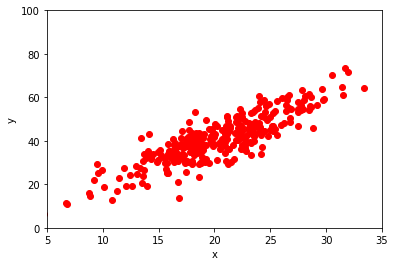

In [53]:

import matplotlib.pyplot as plt
plt.plot(x_data,y_data,'ro')
plt.ylim([0,100])
plt.xlim([5,35])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [54]:
import numpy as np
import tensorflow as tf

input_fn_train = tf.estimator.inputs.numpy_input_fn(
    x = {"x":np.array(x_data[:200],dtype=np.float32)},
    y = np.array(y_data[:200],dtype=np.float32),
    num_epochs=100000,
    batch_size=50,
    shuffle=True
)

input_fn_eval = tf.estimator.inputs.numpy_input_fn(
    x = {"x":np.array(x_data[200:300],dtype=np.float32)},
    y = np.array(y_data[200:300],dtype=np.float32),
    num_epochs=100000,
    batch_size=50,
    shuffle=True
)

input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    x = {"x":np.array([15,20,25,30],dtype=np.float32)},
    num_epochs=1,
    shuffle=False
)
column_x = tf.feature_column.numeric_column("x",dtype=tf.float32)
columns = [column_x]

tf.logging.set_verbosity(tf.logging.INFO)

model_params = {"learning_rate": 0.001}
estimator = tf.estimator.LinearRegressor(feature_columns=columns,optimizer="Adam")
estimator.train(input_fn = input_fn_train,steps=1000)
'''
estimator = tf.contrib.learn.DNNLinearCombinedRegressor(
    linear_feature_columns=columns,
    dnn_feature_columns=[],
    dnn_hidden_units=[100, 50])
estimator.fit(input_fn = input_fn_train,steps=1000)
'''

estimator.evaluate(input_fn = input_fn_eval,steps=10)
result = list(estimator.predict(input_fn = input_fn_predict))

print (result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': '/var/folders/nl/k74j52jd4bg8_h8gyhg15q_400bvyx/T/tmpVrC7Ps', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/nl/k74j52jd4bg8_h8gyhg15q_400bvyx/T/tmpVrC7Ps/model.ckpt.
INFO:tensorflow:loss = 87233.4, step = 1
INFO:tensorflow:global_step/sec: 1051.78
INFO:tensorflow:loss = 1406.96, step = 101 (0.096 sec)
INFO:tensorflow:global_step/sec: 1110.32
INFO:tensorflow:loss = 2117.69, step = 201 (0.090 sec)
INFO:tensorflow:global_step/sec: 1044.67
INFO:tensorflow:loss = 1535.34, step = 301 (0.096 sec)
INFO:tensorflow:global_step/sec: 1044.06
INFO:tensorflow:loss = 1327.8, step = 401 (0.096 sec)
INFO:tensorflow:global_step/sec: 